# 타이타닉 튜토리얼 필사하기
https://kaggle-kr.tistory.com/17?category=868316

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [2]:
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### 1. 데이터셋 확인
#### 2. 탐색적 데이터 분석
#### 3. feature engineering
#### 4. model 구축
#### 5. 모델 학습 및 예측
#### 6. 모델 평가

## 1. Dataset확인

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Feature : Pclass, Age, SibSp, Parch, Fare
* Target label : Survived

|변수(feature, variable)|	정의|	설명|	타입|
|--|--|--|--|
|survival	|생존여부|	target label 임. 1, 0 으로 표현됨|	integer|
|Pclass|	티켓의 클래스|	1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature|integer|
|sex	|성별|	male, female 로 구분되며 binary	|string|
|Age	|나이|	continuous	|integer|
|sibSp	|함께 탑승한 형제와 배우자의 수|	quantitative	|integer|
|parch	|함께 탑승한 부모, 아이의 수|	quantitative	|integer|
|ticket	|티켓 번호|	alphabat + integer	|string|
|fare	|탑승료|	continuous	|float|
|cabin	|객실 번호|	alphabat + integer	|string|
|embared	|탑승 항구|	C = Cherbourg, Q = Queenstown, S = Southampton	|string|

feature가 가진 통계치(pandas, describe())

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null data check

null data가 얼마나 존재하는지 확인해봅시다

In [12]:
for col in df_train.columns:
    msg = 'column: {:>11}\t Percent of NaN value: {:.2f}'.format(
    col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00
column:    Survived	 Percent of NaN value: 0.00
column:      Pclass	 Percent of NaN value: 0.00
column:        Name	 Percent of NaN value: 0.00
column:         Sex	 Percent of NaN value: 0.00
column:         Age	 Percent of NaN value: 19.87
column:       SibSp	 Percent of NaN value: 0.00
column:       Parch	 Percent of NaN value: 0.00
column:      Ticket	 Percent of NaN value: 0.00
column:        Fare	 Percent of NaN value: 0.00
column:       Cabin	 Percent of NaN value: 77.10
column:    Embarked	 Percent of NaN value: 0.22


In [13]:
for col in df_test.columns:
    msg = 'column: {:>11}\t Percent of NaN value: {:.2f}'.format(
    col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00
column:      Pclass	 Percent of NaN value: 0.00
column:        Name	 Percent of NaN value: 0.00
column:         Sex	 Percent of NaN value: 0.00
column:         Age	 Percent of NaN value: 20.57
column:       SibSp	 Percent of NaN value: 0.00
column:       Parch	 Percent of NaN value: 0.00
column:      Ticket	 Percent of NaN value: 0.00
column:        Fare	 Percent of NaN value: 0.24
column:       Cabin	 Percent of NaN value: 78.23
column:    Embarked	 Percent of NaN value: 0.00


* Train, Test set에서 Age, Cabin, Embarked(train만 0.22%) null data가 존재하는 것을 볼 수 있습니다.
* MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.

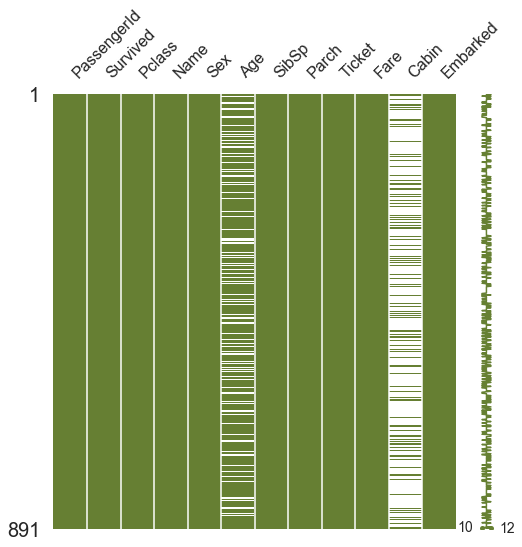

In [21]:
msno.matrix(df=df_train.iloc[:,:], 
            figsize=(8, 8), 
            color=(0.4, 0.5, 0.2))

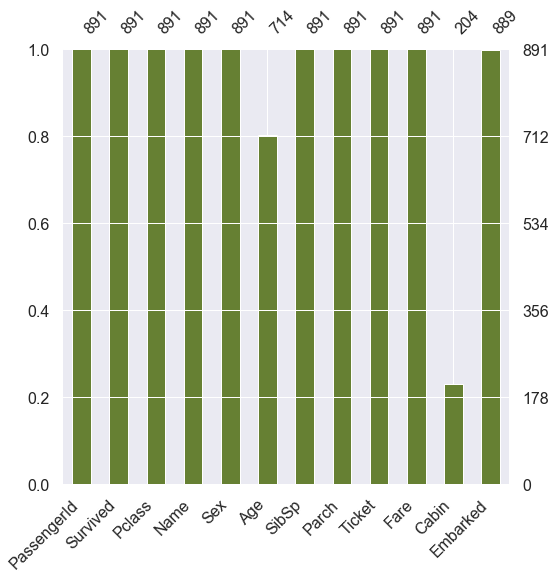

In [22]:
msno.bar(df=df_train.iloc[:,:], 
            figsize=(8, 8), 
            color=(0.4, 0.5, 0.2))

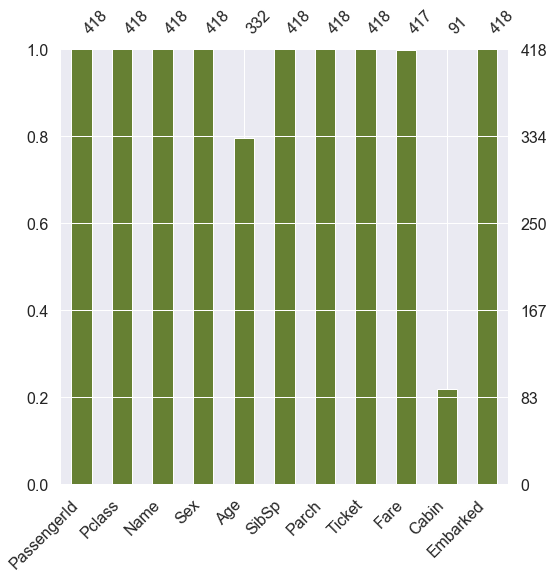

In [23]:
msno.bar(df=df_test.iloc[:,:], 
            figsize=(8, 8), 
            color=(0.4, 0.5, 0.2))

### 1.2 Target label 확인

* target label 이 어떤 distribution을 가지고 있는지 확인해봐야 합니다.
* 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 다랄질 수 있습니다.

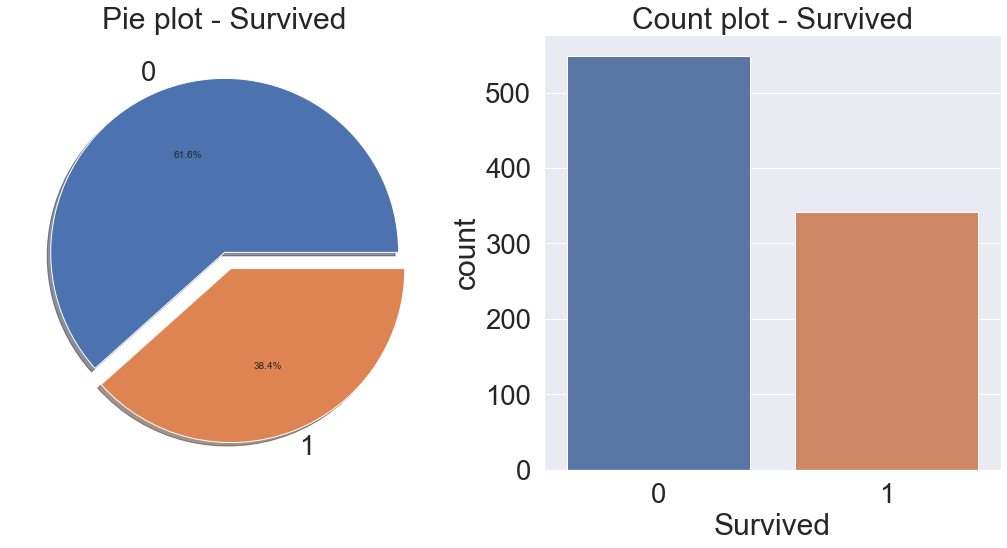

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                           autopct='%1.1f%%', ax=ax[0],
                                          shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* 생존 : 38.4%
* 사망 : 61.6%
* target label 의 분포가 제법 균일(balanced)합니다.
불균일한 경우, 예를 들어 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.


## 2. Exploratory data analysis

* 시각화 라이브러리 : matplotlib, seaborn, plotly

### 2.1 Pclass
* 먼저 Pclass 에 대해서 살펴보겠습니다. Pcalss는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.
* 먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.
* 'Pclass', 'Survived'를 가져온 후 , pclass로 묶습니다. 그러고 나면 각 pclass 마다 0, 1, 이 count가 되는데, 이를 평균내면 각 pclass별 생존률이 나옵니다.
* 아래와 같이 count() 를 하면, 각 class 에 몇 명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명 중 생존한(survived=1)사람의 총합을 주게 됩니다.

In [27]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [28]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


* padas 의 crosstab 을 사용하면 좀 더 위의 과정을 좀 더 수월하게 볼 수 있습니다.

In [29]:
pd.crosstab(df_train['Pclass'], 
            df_train['Survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있습니다.
class 1이면 아래와 같습니다.

136/(80 + 136) = 0.63

In [32]:
136/(80 + 136)

0.6296296296296297

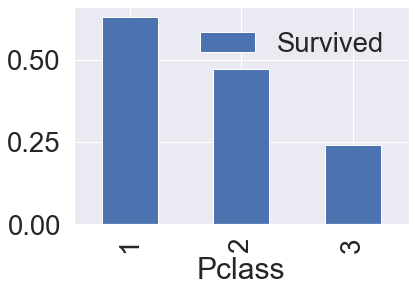

In [8]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],
                                        as_index=True).mean().sort_values(by='Survived',
                                                                  ascending=False).plot.bar()

* 보다시피, Pclass 가 좋을수록(1st) 생존률이 높은 것을 확인할 수 있습니다.
* 좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn의 countplot 을 이용하면, 특정 label 에 따른 개수를 확인해 볼 수 있습니다.

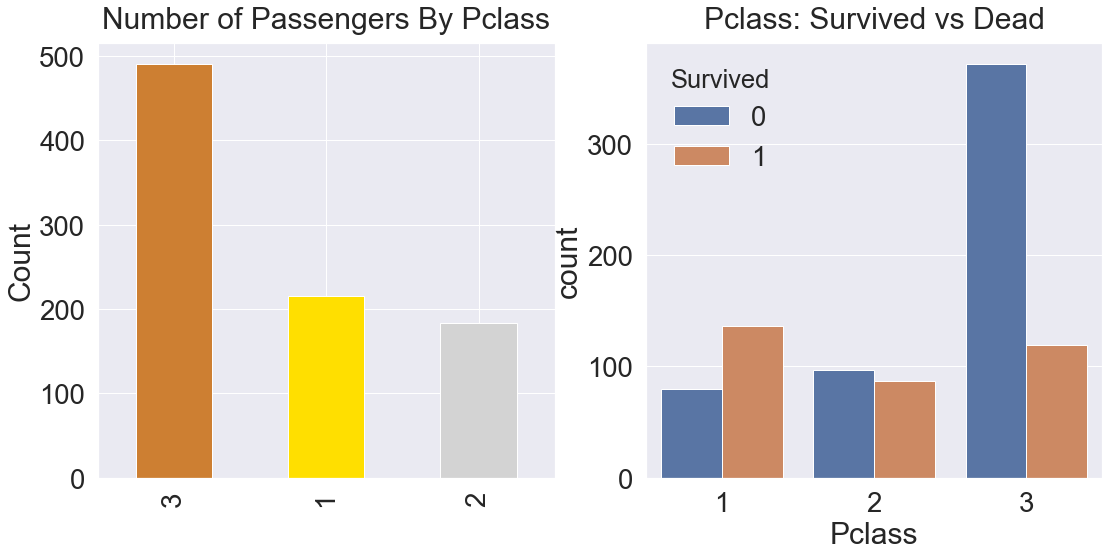

In [10]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

* 클래스가 높을 수록, 생존확률이 높은 것을 확인 할 수 있습니다. Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다.
* 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해 볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

### 2.2 Sex
* 이번엔는 성별로 생존률이 어떻게 다랄지는 지 확인해 보겠습니다.
* 마찬가지로 pandas groupby 와 seaborn countplot 을 사용해서 시각화를 해봅시다.

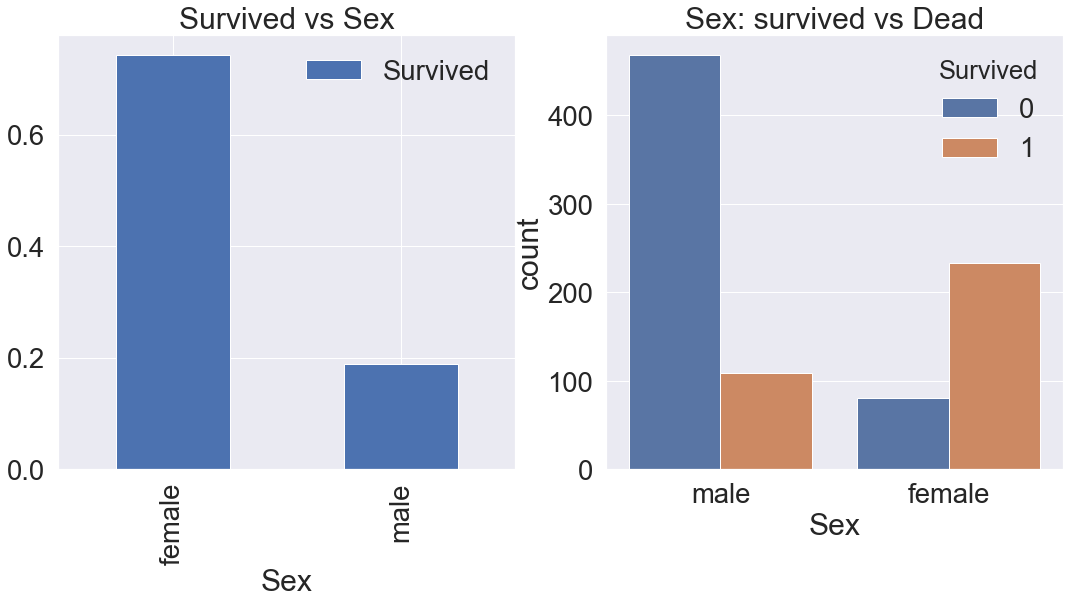

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], 
                                      as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: survived vs Dead')
plt.show()

* 보시다시피, 여성의 생존률이 높습니다.

In [12]:
df_train[['Sex', 'Survived']].groupby(['Sex'],
                                     as_index=False).mean().sort_values(by='Survived',
                                                                       ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
pd.crosstab(df_train['Sex'], 
            df_train['Survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* Pclass 와 마찬가지로, Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있습니다.

### 2.3 Both Sex and Pclass
* 이번에는 Sex, Pclass 두 가지에 관하여 생존이 어덯게 달라지는지 확인해 봅시다.
* seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차워능로 이루어진 그래프를 그릴 수 있습니다.

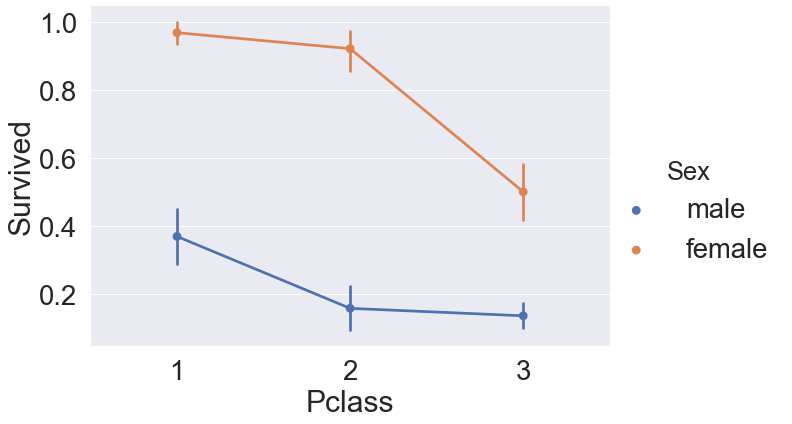

In [19]:
sns.factorplot('Pclass', 'Survived', 
               hue = 'Sex', 
               data=df_train, 
               size=6, 
               aspect=1.5)

* 모든 클래스에서 female 이 살 확률이 male 보다 높은 것을 알 수 있습니다.
* 또한 남여 상관없이 클래스가 높을 수록 살 확률이 높습니다.
* 위 그래프는 hue 대신 column 으로 하면 아래와 같아집니다.

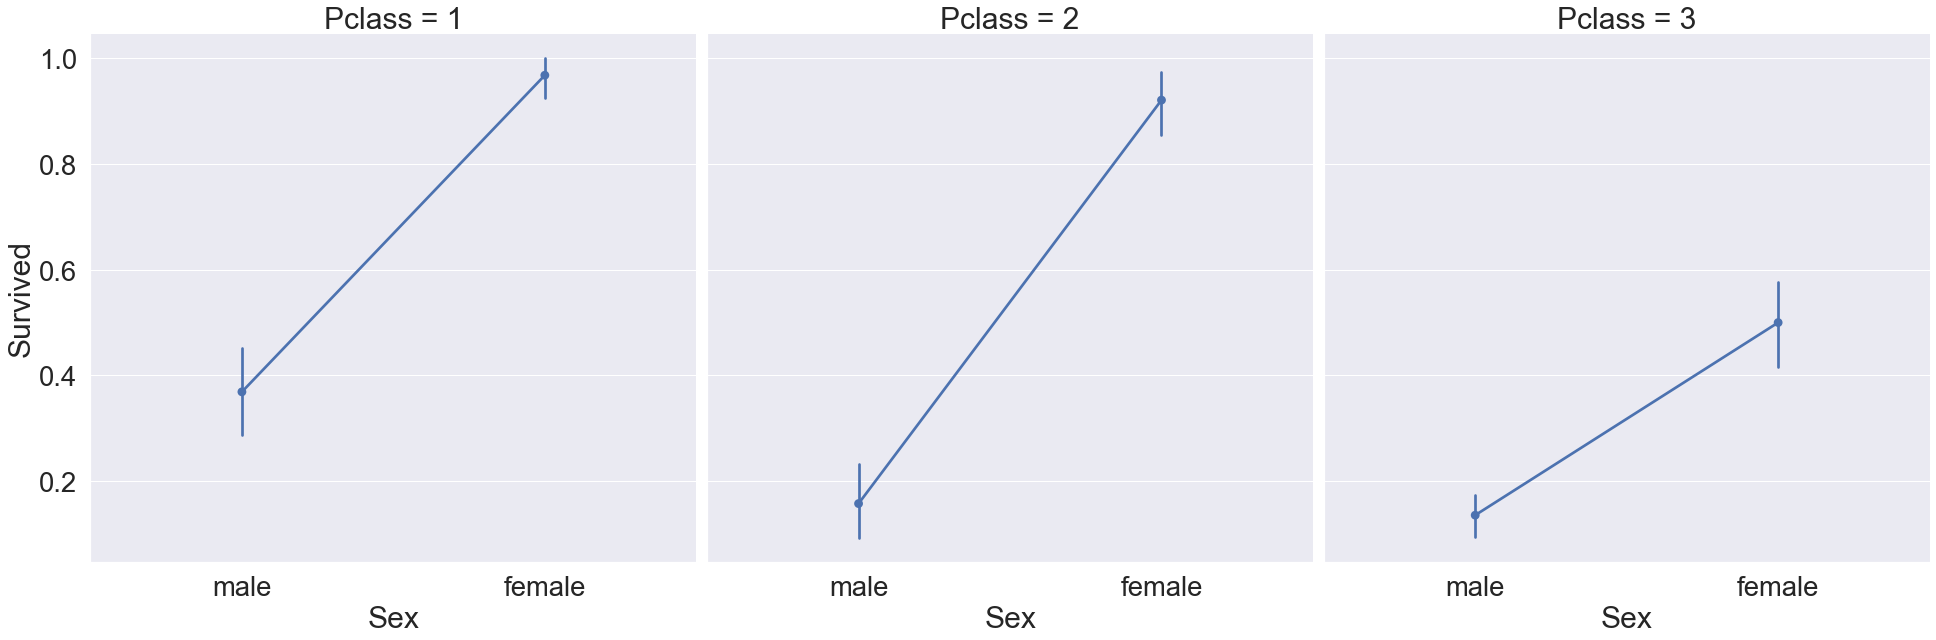

In [26]:
sns.factorplot(x = 'Sex',
              y = 'Survived', 
              col = 'Pclass',
              data = df_train,
              satureation = 0.5,
              size = 9,
              aspect = 1)

### 2.4 Age
* 이번에는 Age feature 를 살펴봅시다.

In [29]:
print('최고령 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('최연소 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균나이 : {:.1f} Years'.format(df_train['Age'].mean()))

최고령 탑승객 : 80.0 Years
최연소 탑승객 : 0.4 Years
탑승객 평균나이 : 29.7 Years


* 생존에 따른 Age의 histogram 을 그려보겠습니다.

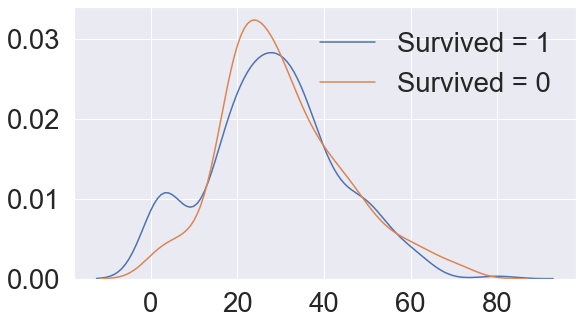

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

* 보시다시피, 생존자 중 나이가 어린 경우가 많음을 볼 수 있습니다.

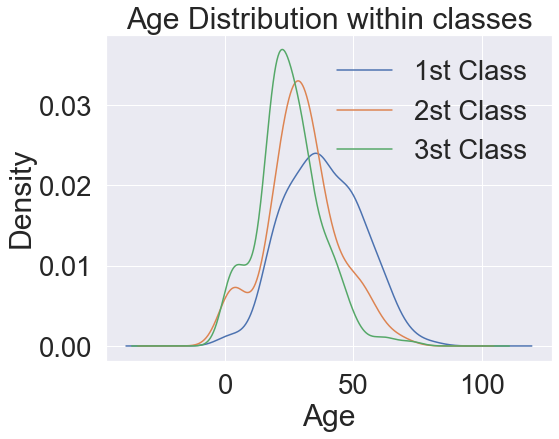

In [31]:
# Age distribution sithing classes
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2st Class', '3st Class'])

* Class 가 높을 수록 나이 많은 사람의 비중이 커지는 것을 확인 할 수 있습니다.

* 이제 나이대가 변하면서 생존률이 어떻게 되는지 보려고 합니다.
* 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

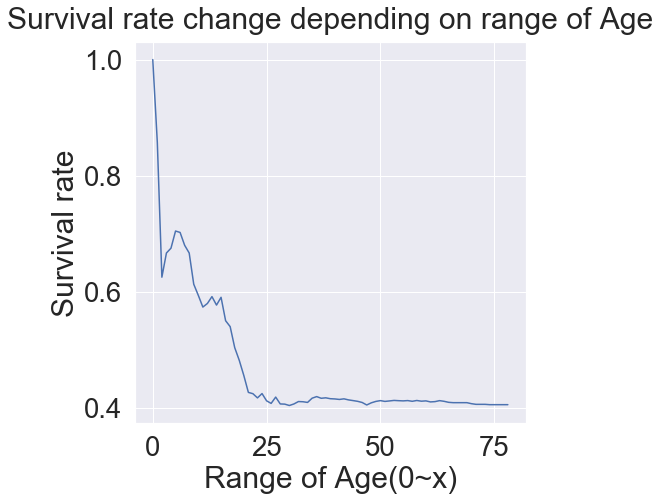

In [32]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age'] < i]['Survived'].sum()
        / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 보시다시피ㅏ, 나이가 어릴 수록 생존률이 확실히 높은 것을 확인할 수 있습니다.
* 우리는 이 나이가 중요한 feature로 쓰일 수 있음을 확인했습니다.

### 2.5 Pclass, Sex, Age
* 지금까지 본, Sex, Pclass, Age, Survived 모두 보고 싶다면 seaborn의 violinplot을 활용하면 됩니다.
* x 축은 우리가 나ㅝ서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y축은 보고 싶어하는 distribution(Age) 입니다.

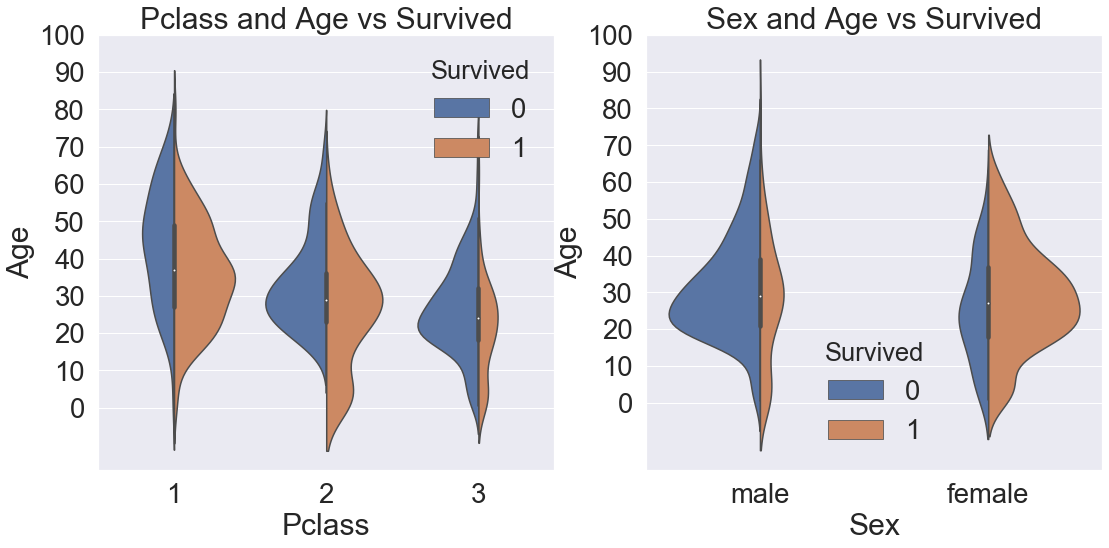

In [36]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', 
               hue = 'Survived', 
               data = df_train, 
               scale = 'count', 
               split = True,
               ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age',
               hue = 'Survived', 
               data = df_train, 
               scale = 'count', 
               split = True,
               ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

* 왼쪽 그림은 Pclass 별로 Age의 distribution 이 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프입니다.
* 오른쪽 그림도 마찬가지 Sex, 생존에 따른 distribution 이 어덯게 다른지 보여주는 그래프입니다.
* 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있습니다.
* 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한것을 볼 수 있습니다.
* 이로써 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

### 2.6 Embarked
* Embarked 는 **탑승한 항구**를 나타냅니다.
* 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존률을 보겠습니다.

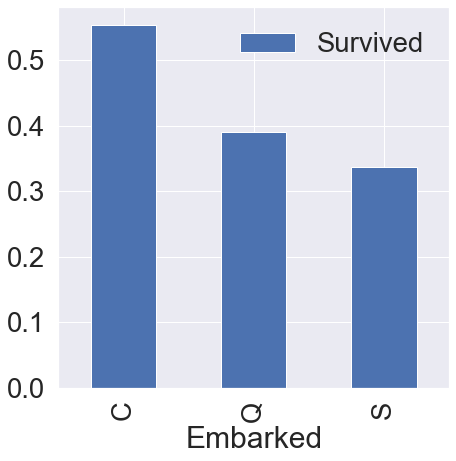

In [6]:
f, ax = plt.subplots(1, 1, figsize = (7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'],
                                           as_index=True).mean().sort_values(by='Survived',
                                                                           ascending=False).plot.bar(ax=ax)

* 보시다시피, 조금의 차이는 있지만 생존률은 비슷하며 C가 제일 높습니다.
* 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
* 사실, 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다.
* 다은 feature 로 split 하여 한번 살펴보겠습니다.

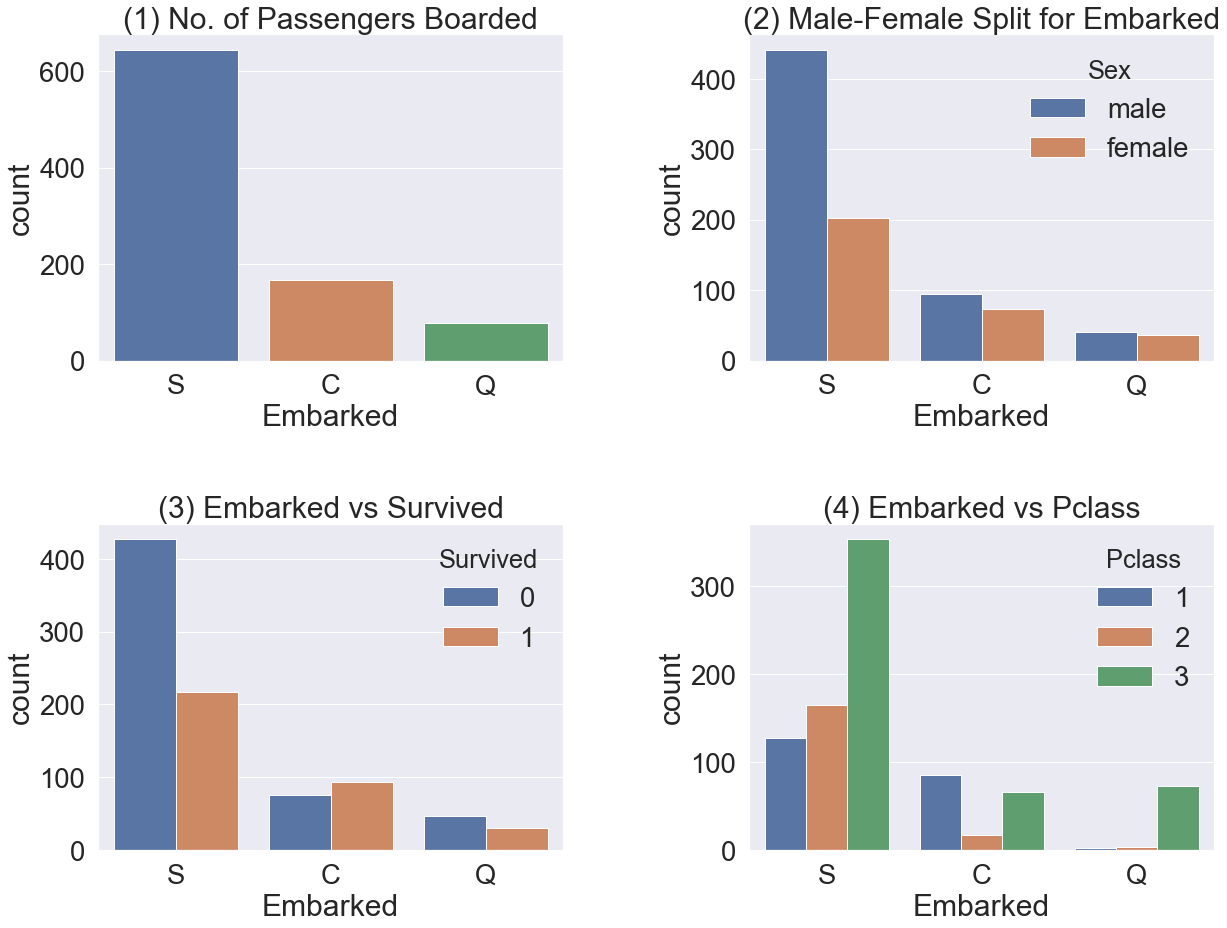

In [12]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1,0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1,1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

* Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.
* Figure(2) - C 와 Q 는 남녀 배율이 비슷하고, S 는 남자가 더 많습니다.
* Figure(3) - 생존확률이 S 일 경우 많이 낮은 것을 볼 수 있습니다.
* Figure(4) - Class 로 split 해서 보니, C 가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S 는 3rd class 가 많아서 생존확률이 낮게 나왔습니다.

### 2.7 Family - SibSop(형제 자매) + Parch(부모, 자녀)
* SibSp와 Parch를 합하면 Family 가 됩니다.

In [14]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신 + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신 + 1

In [16]:
print("Maximum size of Family : ", df_train['FamilySize'].max())
print("minimum size of Family : ", df_train['FamilySize'].min())

Maximum size of Family :  11
minimum size of Family :  1


* FamilySize 와 생존 관계를 한번 살펴봅시다.

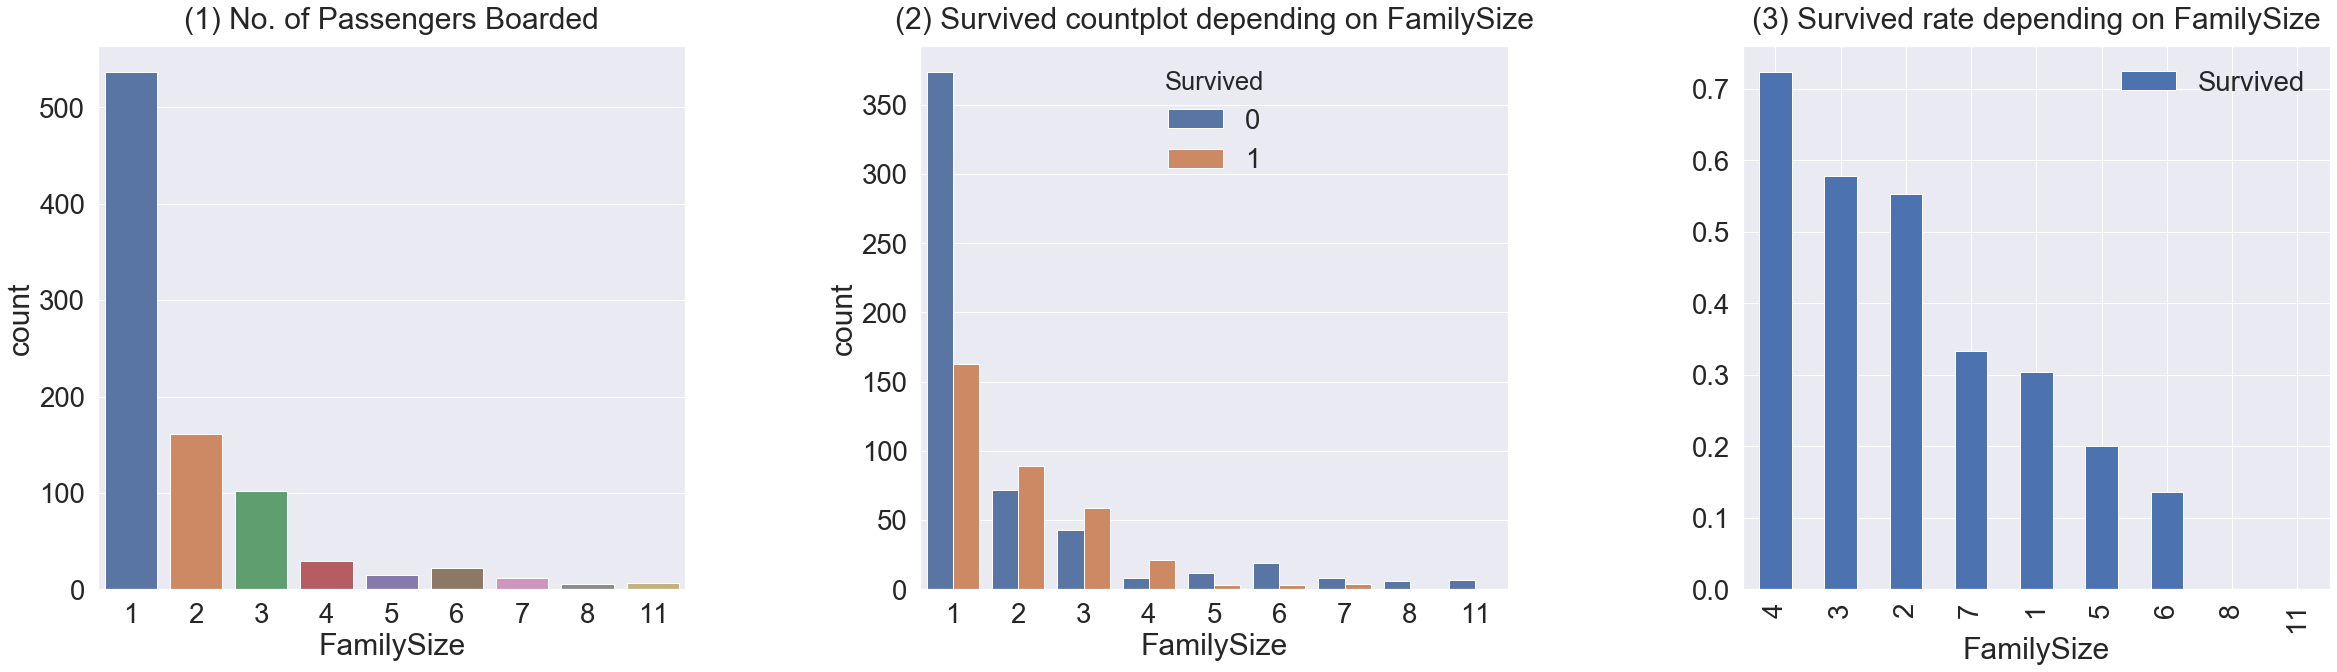

In [20]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))

sns.countplot('FamilySize', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y = 1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                                             as_index=True).mean().sort_values(by='Survived', 
                                                                               ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y = 1.02)

plt.subplots_adjust(wspace = 0.4, hspace = 0.5)
plt.show()

* Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
* Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. <br>
가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아집니다.<br>
가족수가 너무 적어도(1), 너무 커도(5, 6, 8, 11)생존확률이 작습니다.<br>
3~4명 선에서 생존확률이 높으 것을 확인할 수 있습니다.<br>

### 2.8 Fare
* Fare 는 탑승요금이며, contious feature 입니다. 한번 histogram을 그려보겠습니다.

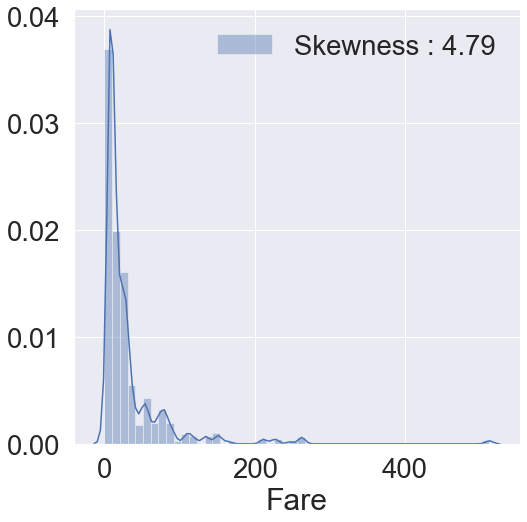

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], 
                 color = 'b',
                label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()),
                ax = ax)
g = g.legend(loc = 'best')

* 보시다시피, distribution 이 매우 비대칭인 것을 알 수 있습니다. (high skewness).
만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다. 
* outlier 의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.
* 여기서 우리는 pandas 의 유용한 기능을 사용할 것입니다. DataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.
* 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare ccolumns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

In [26]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

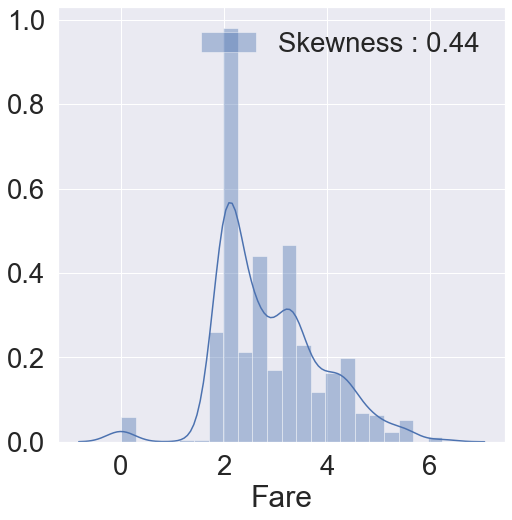

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (8,8) )
g = sns.distplot(df_train['Fare'], 
                 color = 'b',
                label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()),
                ax = ax)
g = g.legend(loc = 'best')

* log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
* 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
* 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.
* 모델을 학습시키기 위해, 그래고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라고 하는데, 우리는 이제 그럿을 살펴볼 것입니다.

### 2.9 Cabin
* 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.
* 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [6]:
df_train['Cabin'].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

### 2.10 Ticket
* 이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [8]:
df_train['Ticket'].value_counts()

347082                7
1601                  7
CA. 2343              7
347088                6
CA 2144               6
3101295               6
S.O.C. 14879          5
382652                5
113781                4
W./C. 6608            4
2666                  4
349909                4
347077                4
113760                4
LINE                  4
17421                 4
19950                 4
PC 17757              4
4133                  4
C.A. 34651            3
110152                3
363291                3
230080                3
110413                3
C.A. 31921            3
347742                3
35273                 3
PC 17572              3
F.C.C. 13529          3
13502                 3
                     ..
C.A. 31026            1
C.A. 5547             1
347078                1
28424                 1
348121                1
C.A. 24579            1
PC 17601              1
349204                1
349910                1
C.A. 34260            1
W/C 14208       